In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.externals import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
def make_features(df, filter_bottom = False):
    df['code/files'] = df['code_lines']/df['n_pyfiles']
    df['comment/code'] = df['comment_lines']/df['code_lines']
    df['test/code'] = df['test_lines']/df['code_lines']
    df['readme/code'] = df['readme_lines']/df['code_lines']
    df['docstring/code'] = df['docstring_lines']/df['code_lines']
    
    try:
        df['commits/code'] = df['n_commits']/df['code_lines']
    except:
        print('couldnt find n_commits')
    
    for p in ['E1','E2','E3','E4','E5','E7','E9','W1','W2','W3','W5','W6']:
        df['%s/code'%p] = df[p]/df['code_lines']
    
    df = df.dropna(how='any').drop_duplicates()
    
    if filter_bottom == True:
        for f in ['code/files', 'comment/code', 'test/code', 'readme/code', 'docstring/code']:
            df = df[df[f] > 0]
    
    return df

In [104]:
names = ['url', 'n_pyfiles', 'code_lines', 'comment_lines', 'docstring_lines',
         'test_lines','readme_lines', 'n_commits', 'commits_per_time', 'n_stars', 'n_forks', 'E1','E2','E3',
         'E4','E5','E7','E9','W1','W2','W3','W5','W6']

df_good = pd.read_csv('repo_data/top_stars_stats_Python.txt', names=names)
df_good = make_features(df_good, filter_bottom=True)
df_good.tail()

,url,n_pyfiles,code_lines,comment_lines,docstring_lines,test_lines,readme_lines,n_commits,commits_per_time,n_stars,...,E3/code,E4/code,E5/code,E7/code,E9/code,W1/code,W2/code,W3/code,W5/code,W6/code
2235,https://api.github.com/repos/schematics/schema...,68,12034,389,759,6674,69,30,91.100000,1982,...,0.004986,0.000332,0.025677,0.001579,0.0,0.000000,0.000166,0.000831,0.0,0.000831
2237,https://api.github.com/repos/elastic/curator,95,19962,1136,1669,10690,73,30,58.866667,1983,...,0.047190,0.001202,0.046689,0.003156,0.0,0.000100,0.008015,0.000150,0.0,0.000351
2238,https://api.github.com/repos/tensorflow/clever...,101,22626,1331,3746,3836,170,30,21.466667,1982,...,0.000398,0.000000,0.002342,0.000707,0.0,0.000000,0.000044,0.000044,0.0,0.000000
2239,https://api.github.com/repos/mdbloice/Augmentor,21,6817,711,1886,2263,207,30,28.066667,1989,...,0.002200,0.010562,0.075987,0.001174,0.0,0.000000,0.000293,0.000147,0.0,0.001027
2242,https://api.github.com/repos/ckan/ckan,561,105616,5553,1716,47695,60,30,80.500000,1969,...,0.005728,0.000227,0.014562,0.000918,0.0,0.001098,0.000899,0.000322,0.0,0.001297


In [107]:
# names = ['url', 'n_pyfiles', 'code_lines', 'comment_lines', 'docstring_lines',
#          'test_lines','readme_lines','E1','E2','E3',
#          'E4','E5','E7','E9','W1','W2','W3','W5','W6']
names = ['url', 'n_pyfiles', 'code_lines', 'comment_lines', 'docstring_lines',
         'test_lines','readme_lines', 'n_commits', 'commits_per_time', 'n_stars', 'n_forks', 'E1','E2','E3',
         'E4','E5','E7','E9','W1','W2','W3','W5','W6']
df_bad = pd.read_csv('repo_data/bottom_stars_stats_Python.txt', names=names)
df_bad = make_features(df_bad)
df_bad.tail()

,url,n_pyfiles,code_lines,comment_lines,docstring_lines,test_lines,readme_lines,n_commits,commits_per_time,n_stars,...,E3/code,E4/code,E5/code,E7/code,E9/code,W1/code,W2/code,W3/code,W5/code,W6/code
2333,https://api.github.com/repos/coddingtonbear/ta...,3,100,20,1,0,0,1,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2334,https://api.github.com/repos/rjewell/wolfram_w...,1,15,0,0,0,3,4,0.000000,0,...,0.000000,0.000000,0.133333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.533333
2335,https://api.github.com/repos/christiprez/circleci,2,34,0,0,16,4,30,0.166667,0,...,0.058824,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2336,https://api.github.com/repos/Uberi/Moby-Bic,2,112,26,0,0,2,3,0.000000,0,...,0.035714,0.008929,0.214286,0.160714,0.0,0.0,0.000000,0.0,0.0,0.008929
2337,https://api.github.com/repos/jdeitmerg/cral,1,221,8,69,0,58,16,0.125000,0,...,0.004525,0.000000,0.000000,0.000000,0.0,0.0,0.004525,0.0,0.0,0.000000


In [108]:
fontsize=14
for p in ['code/files','comment/code','test/code','readme/code','docstring/code','commits_per_time']:
    plt.figure(figsize=(10,6))
    plt.plot(df_good['code_lines'], df_good[p], '.', label='200+ stars/forks')
    plt.plot(df_bad['code_lines'], df_bad[p], '.', label='0 stars/forks')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('code_lines',fontsize=fontsize)
    plt.legend()
    plt.ylabel(p, fontsize=fontsize)
    plt.savefig('images/%s.png'%p.replace('/','_'))
    plt.close()
    
for p in ['E1','E2','E3','E4','E5','E7','E9','W1','W2','W3','W5','W6']:
    plt.figure(figsize=(10,6))
    plt.plot(df_good['code_lines'], df_good['%s/code'%p], '.', label='200+ stars/forks')
    plt.plot(df_bad['code_lines'], df_bad['%s/code'%p], '.', label='0 stars/forks')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('code_lines', fontsize=fontsize)
    plt.ylabel(p, fontsize=fontsize)
    plt.legend()
    plt.savefig('images/%s.png'%p.replace('/','_'))
    plt.close()

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


# One-class SVM

In [109]:
from sklearn.preprocessing import StandardScaler
features = ['code/files','comment/code','test/code','readme/code','docstring/code','commits_per_time',
            'E1/code','E2/code','E3/code',
            'E4/code','E5/code','E7/code',
            'W1/code','W2/code','W3/code','W6/code','code_lines']

# log data, really useful
X = np.log10(df_good[features])
Xb = np.log10(df_bad[features])

# replace log10(0) values with minimum - 2 (2 orders of mag lower)
X_join = pd.concat([X, Xb], axis=0)
fillna = {}
for c in X_join.columns:
    minval = np.floor(np.min(X_join.loc[X_join[c] > -np.inf, c].values) - 1)
    X.loc[X[c] == -np.inf, c] = minval
    X.loc[X[c] == np.inf, c] = minval
    Xb.loc[Xb[c] == -np.inf, c] = minval
    Xb.loc[Xb[c] == np.inf, c] = minval    

# standardize
scaler = StandardScaler()
scaler.fit(pd.concat([X, Xb], axis=0)) # need to scale over all X+Xb data together!
X = scaler.transform(X)
Xb = scaler.transform(Xb)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [110]:
# try to maximize recall whilst including as few background samples as possible
def focal_score(y_pred_test, y_pred_bkgnd, nu, gamma):
    # recall
    recall = len(np.where(y_pred_test == 1)[0])/float(len(y_pred_test))
    
    # fraction of background samples with a positive classification
    bckgnd_focal_frac = len(np.where(y_pred_bkgnd == 1)[0])/float(len(y_pred_bkgnd))
    
    try:
        score = recall**2 / bckgnd_focal_frac
    except ZeroDivisionError:
        print(("recall=%f, background_focal_frac=%f,"
               "nu=%f, gamma=%f")%(recall, bckgnd_focal_frac, nu, gamma))
        score = 0
    return score, recall, bckgnd_focal_frac

def random_train_test_split(X, train_frac = 0.8):
    N = len(X)
    rN = np.arange(0, N)
    np.random.shuffle(rN)  # randomly shuffle data
    train_i, test_i = rN[0: int(train_frac*N)], rN[int(train_frac*N):]
    
    X_train, X_test = X[train_i], X[test_i]
    return X_train, X_test

def train_model(X, Xb, nu, loggamma, n_cv=3, recall_thresh=0.90):
    # iterate over hypers, cv
    scores = []
    nu_best = 0
    loggamma_best = 0
    score_best = 0
    for n in nu:
        for g in loggamma:
            sc, rc, bg = [], [], []
            for i in range(n_cv):
                X_train, X_test = random_train_test_split(X)
                
                clf = svm.OneClassSVM(kernel='rbf', nu=n, gamma=10**g)
                clf.fit(X_train)
                y_pred_test = clf.predict(X_test)
                y_pred_bkgnd = clf.predict(Xb)
                score_, recall_, bkgnd_ = focal_score(y_pred_test, y_pred_bkgnd, n, g)
                sc.append(score_)
                rc.append(recall_)
                bg.append(bkgnd_)
            
            meansc = np.mean(sc)
            meanrc = np.mean(rc)
            meanbg = np.mean(bg)
            if (meansc > score_best) and (meanrc > recall_thresh):
                nu_best = n
                loggamma_best = g
                score_best = meansc
            scores.append([n, g, meansc, meanrc, meanbg])
            
    # train best model
    clf_best = svm.OneClassSVM(kernel='rbf', nu=nu_best,
                               gamma=10**loggamma_best)
    clf_best.fit(X_train)

    # write/save stuff
    clf_name = 'models/OC-SVM_n%.1f_logg%.1f.pkl'%(nu_best, loggamma_best)
    joblib.dump(clf_best, clf_name)
    best = [clf_best, nu_best, loggamma_best, score_best]
    print('best model is nu=%f, log10(gamma)=%f, score=%f'%(nu_best, loggamma_best, score_best))
    return scores, best

In [114]:
from sklearn import svm
from sklearn import metrics
nu = np.linspace(0.01, 1, 20)  # 0-1 range
loggamma = np.linspace(-4, 2, 10)
n_cv = 3

In [115]:
scores, best = train_model(X, Xb, nu, loggamma)

recall=0.003953, background_focal_frac=0.000000,nu=0.010000, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.010000, gamma=0.666667
recall=0.003953, background_focal_frac=0.000000,nu=0.010000, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.010000, gamma=1.333333
recall=0.000000, background_focal_frac=0.000000,nu=0.010000, gamma=1.333333
recall=0.000000, background_focal_frac=0.000000,nu=0.010000, gamma=1.333333
recall=0.000000, background_focal_frac=0.000000,nu=0.010000, gamma=2.000000
recall=0.000000, background_focal_frac=0.000000,nu=0.010000, gamma=2.000000
recall=0.003953, background_focal_frac=0.000000,nu=0.010000, gamma=2.000000
recall=0.000000, background_focal_frac=0.000000,nu=0.062105, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.062105, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.062105, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.062105, gamma=1.333333
recall=0.000

recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=0.666667
recall=0.003953, background_focal_frac=0.000000,nu=0.635263, gamma=1.333333
recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=1.333333
recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=1.333333
recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=2.000000
recall=0.003953, background_focal_frac=0.000000,nu=0.635263, gamma=2.000000
recall=0.000000, background_focal_frac=0.000000,nu=0.635263, gamma=2.000000
recall=0.000000, background_focal_frac=0.000000,nu=0.687368, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.687368, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.687368, gamma=0.666667
recall=0.000000, background_focal_frac=0.000000,nu=0.687368, gamma=1.333333
recall=0.000

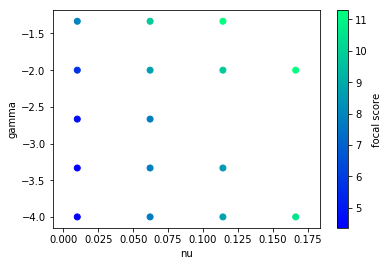

In [118]:
nu, gamma, sc, recall, bckgnd = zip(*scores)
nu, gamma, sc, recall, bckgnd = np.array(nu), np.array(gamma), np.array(sc), np.array(recall), np.array(bckgnd)
index = recall > 0.85
plt.scatter(nu[index], gamma[index], c=sc[index], cmap=plt.get_cmap('winter'))
plt.xlabel('nu')
plt.ylabel('gamma')
plt.colorbar(label='focal score')

0.8458498023715415 0.06713164777680906 10.65759461991242


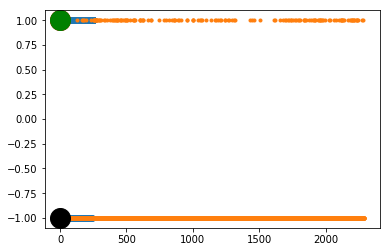

In [124]:
n = 0.11
g = -1.33

X_train, X_test = random_train_test_split(X)
clf = svm.OneClassSVM(kernel="rbf", nu=n, gamma=10**g)
clf.fit(X_train)

y_pred_test = clf.predict(X_test)
y_pred_background = clf.predict(Xb)
y_DeepMoon = clf.predict(DM)[0]
y_tauceti = clf.predict(TC)[0]
y_rebound = clf.predict(RB)[0]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y_pred_test, 'o')
plt.plot(y_pred_background, '.')
plt.plot(y_DeepMoon, 'o', color='red', ms=20)
plt.plot(y_tauceti, 'o', color='black', ms=20)
plt.plot(y_rebound, 'o', color='green', ms=20)

recall = len(np.where(y_pred_test == 1)[0])/float(len(X_test))
background_focal_frac = len(np.where(y_pred_background == 1)[0])/float(len(Xb))
print(recall, background_focal_frac, recall**2/background_focal_frac)

## Does this make sense? Seems to

96.2904498816101


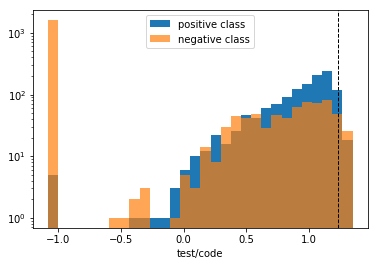

In [129]:
y_pred_train = clf.predict(X_train)
train_pos = y_pred_train == 1
train_neg = y_pred_train == -1
test_pos = y_pred_test == 1
test_neg = y_pred_test == -1
back_pos = y_pred_background == 1
back_neg = y_pred_background == -1

features = ['code/files','comment/code','test/code','readme/code','docstring/code',
            'commits_per_time',
            'E1/code','E2/code','E3/code',
            'E4/code','E5/code','E7/code',
            'W1/code','W2/code','W3/code','W6/code','code_lines']
fontsize = 14

from scipy.stats import percentileofscore
dim = 2
comp = DM
pos = np.concatenate((X_train[train_pos], X_test[test_pos], Xb[back_pos]))
neg = np.concatenate((X_train[train_neg], X_test[test_neg], Xb[back_neg]))
print(percentileofscore(pos[:,dim], comp[:,dim]))

bins = 30
_, _, _ = plt.hist(pos[:,dim], bins=bins, label='positive class');
_, _, _ = plt.hist(neg[:,dim], bins=bins, alpha=0.7, label='negative class');
plt.axvline(comp[:,dim], color='k', linestyle='dashed', linewidth=1);
plt.xlabel(features[dim]);
plt.yscale('log')
plt.legend()

# plot
# x_ = -1
# y_ = 3
# plt.figure(figsize=(10,6))
# plt.plot(X_train[train_pos, x_], X_train[train_pos, y_], '.', color='blue', label='focal pos')
# plt.plot(X_test[test_pos, x_], X_test[test_pos, y_], '.', color='blue')
# plt.plot(X_train[train_neg, x_], X_train[train_neg, y_], '.', color='red', label='focal neg')
# plt.plot(X_test[test_neg, x_], X_test[test_neg, y_], '.', color='red')
# plt.plot(Xb[back_pos, x_], Xb[back_pos, y_], 'x', color='blue', label='background pos')
# plt.plot(Xb[back_neg, x_], Xb[back_neg, y_], 'x', color='red', label='background neg')
# plt.plot(DM[0, x_], DM[0, y_], 'co', ms=15, label='silburt/DeepMoon')
# plt.plot(TC[0, x_], TC[0, y_], 'go', ms=15, label='silburt/tau-ceti')
# plt.xlabel(features[x_], fontsize=fontsize)
# plt.ylabel(features[y_], fontsize=fontsize)
# plt.legend()
# plt.savefig('images/out%d.png'%y_)

In [42]:
train_features = ['code/files','comment/code','test/code','readme/code','docstring/code','commits_per_time',
            'E1/code','E2/code','E3/code',
            'E4/code','E5/code','E7/code',
            'W1/code','W2/code','W3/code','W6/code','code_lines']

from sklearn.externals import joblib
def classify_repo(GP, nu=0.6, loggamma=0):
    # prepare data
    name_map = ['url', 'n_pyfiles', 'code_lines', 'comment_lines', 'docstring_lines', 'commits_per_time',
                'test_lines','readme_lines', 'n_commits', 'commits_per_time', 'n_stars',
                'n_forks']
    pep8_map = ['E1','E2','E3','E4','E5','E7','E9','W1','W2','W3','W5','W6']
    data = {}
    for n in name_map:
        data[n] = getattr(GP, n)

    for n in pep8_map:
        data[n] = GP.pep8[n]

    data = make_features(pd.DataFrame.from_dict([data]))

    # prepare feature array
    scaler_name = 'models/scaler.pkl'
    scaler = joblib.load(scaler_name)
    minvals_name = 'models/minvals.pkl'
    minvals = joblib.load(minvals_name)
    X = np.log10(data[train_features])
    for c in X.columns:
        minval = minvals[c]
        X.loc[X[c] == -np.inf, c] = minval
        X.loc[X[c] == np.inf, c] = minval
    X = scaler.transform(X)
    return X

#     # prepare model
#     clf_name = 'models/OC-SVM_n%.1f_logg%.1f.pkl'%(nu, loggamma)
#     clf = joblib.load(clf_name)

#     # generate pred
#     return X, clf.predict(X)[0]

In [120]:
import pickle
DM = pickle.load( open( "users_test/GP_DeepMoon.pkl", "rb" ) )
TC = pickle.load( open( "users_test/GP_tau-ceti.pkl", "rb" ) )
RB = pickle.load( open( "users_test/GP_rebound.pkl", "rb" ) )
DM = classify_repo(DM)
TC = classify_repo(TC)
RB = classify_repo(RB)


/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
